In [211]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
from scipy.integrate import quad

In [212]:
num_frames = 100
timestep = 0.05
t_vals = np.linspace(0.0, (num_frames-1)*timestep, num_frames)
# print(t_vals)
# s_vals = np.linspace(0.0, 2*np.pi, 101)
s_vals = np.linspace(0.0, 1000, 101)
s_vals[0] = 1e-10
s_vals = s_vals[:-1]
print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

[1.0e-10 1.0e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01 7.0e+01 8.0e+01
 9.0e+01 1.0e+02 1.1e+02 1.2e+02 1.3e+02 1.4e+02 1.5e+02 1.6e+02 1.7e+02
 1.8e+02 1.9e+02 2.0e+02 2.1e+02 2.2e+02 2.3e+02 2.4e+02 2.5e+02 2.6e+02
 2.7e+02 2.8e+02 2.9e+02 3.0e+02 3.1e+02 3.2e+02 3.3e+02 3.4e+02 3.5e+02
 3.6e+02 3.7e+02 3.8e+02 3.9e+02 4.0e+02 4.1e+02 4.2e+02 4.3e+02 4.4e+02
 4.5e+02 4.6e+02 4.7e+02 4.8e+02 4.9e+02 5.0e+02 5.1e+02 5.2e+02 5.3e+02
 5.4e+02 5.5e+02 5.6e+02 5.7e+02 5.8e+02 5.9e+02 6.0e+02 6.1e+02 6.2e+02
 6.3e+02 6.4e+02 6.5e+02 6.6e+02 6.7e+02 6.8e+02 6.9e+02 7.0e+02 7.1e+02
 7.2e+02 7.3e+02 7.4e+02 7.5e+02 7.6e+02 7.7e+02 7.8e+02 7.9e+02 8.0e+02
 8.1e+02 8.2e+02 8.3e+02 8.4e+02 8.5e+02 8.6e+02 8.7e+02 8.8e+02 8.9e+02
 9.0e+02 9.1e+02 9.2e+02 9.3e+02 9.4e+02 9.5e+02 9.6e+02 9.7e+02 9.8e+02
 9.9e+02]


In [213]:
num_alphas = 10
alphlowlim = 0.0
alphhighlim = 0.9
num_ds = 50
dlowlim = 0.0
dhighlim = 4.9

In [214]:
alpha_vals = np.linspace(alphlowlim, alphhighlim, num_alphas)
print(alpha_vals)
alpha_vals[0] = 1e-10 # set alpha=0 to a small value
d_vals = np.linspace(dlowlim, dhighlim, num_ds)
print(d_vals)
d_vals[0] = 1e-10 # set d=0 to a small value

# print the shape of the data
print(f"shape of alpha_vals : {alpha_vals.shape}")
print(f"shape of d_vals : {d_vals.shape}")

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
shape of alpha_vals : (10,)
shape of d_vals : (50,)


In [215]:
# load the data from G_pred.txt
# the data is of shape (time_frames, r_vals.shape[0])
G_pred = np.loadtxt("G_pred_test.txt")
print(f"shape of G_pred : {G_pred.shape}")

shape of G_pred : (100, 500)


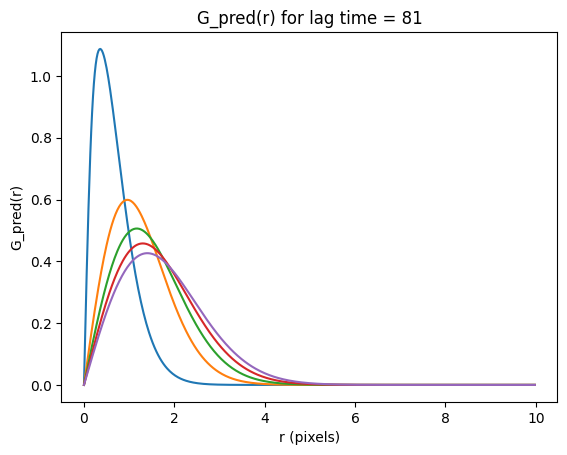

In [216]:
############### check this step ################
G_pred = G_pred * 2 * np.pi * r_vals
############### check this step ################

# plot G_pred
for i in range(1, num_frames, 20):
    # plt.plot(r_vals, G_pred[i, :] * 2 * np.pi * r_vals)
    plt.plot(r_vals, G_pred[i, :])
    plt.xlabel("r (pixels)")
    plt.ylabel("G_pred(r)")
    plt.title(f"G_pred(r) for lag time = {i}")
    # plt.show()
plt.show()

In [217]:
# apply fft on r to get G_pred_k(t, k)
G_pred_k = fft.fft(G_pred, axis=1).real
print(f"shape of G_pred after fft : {G_pred.shape}")
# G_pred_k += 50
# print(f"max value of G_pred : {np.max(G_pred)}")

shape of G_pred after fft : (100, 500)


In [218]:
# get the range of k values
k_vals = fft.fftfreq(r_vals.shape[0], d=r_vals[1]-r_vals[0])
# k_vals = 2 * np.pi * k_vals
k_vals = fft.fftshift(k_vals)
G_pred_k = fft.fftshift(G_pred_k, axes=1)
print(k_vals)
print(f"shape of k_vals : {k_vals.shape}")

[-25.  -24.9 -24.8 -24.7 -24.6 -24.5 -24.4 -24.3 -24.2 -24.1 -24.  -23.9
 -23.8 -23.7 -23.6 -23.5 -23.4 -23.3 -23.2 -23.1 -23.  -22.9 -22.8 -22.7
 -22.6 -22.5 -22.4 -22.3 -22.2 -22.1 -22.  -21.9 -21.8 -21.7 -21.6 -21.5
 -21.4 -21.3 -21.2 -21.1 -21.  -20.9 -20.8 -20.7 -20.6 -20.5 -20.4 -20.3
 -20.2 -20.1 -20.  -19.9 -19.8 -19.7 -19.6 -19.5 -19.4 -19.3 -19.2 -19.1
 -19.  -18.9 -18.8 -18.7 -18.6 -18.5 -18.4 -18.3 -18.2 -18.1 -18.  -17.9
 -17.8 -17.7 -17.6 -17.5 -17.4 -17.3 -17.2 -17.1 -17.  -16.9 -16.8 -16.7
 -16.6 -16.5 -16.4 -16.3 -16.2 -16.1 -16.  -15.9 -15.8 -15.7 -15.6 -15.5
 -15.4 -15.3 -15.2 -15.1 -15.  -14.9 -14.8 -14.7 -14.6 -14.5 -14.4 -14.3
 -14.2 -14.1 -14.  -13.9 -13.8 -13.7 -13.6 -13.5 -13.4 -13.3 -13.2 -13.1
 -13.  -12.9 -12.8 -12.7 -12.6 -12.5 -12.4 -12.3 -12.2 -12.1 -12.  -11.9
 -11.8 -11.7 -11.6 -11.5 -11.4 -11.3 -11.2 -11.1 -11.  -10.9 -10.8 -10.7
 -10.6 -10.5 -10.4 -10.3 -10.2 -10.1 -10.   -9.9  -9.8  -9.7  -9.6  -9.5
  -9.4  -9.3  -9.2  -9.1  -9.   -8.9  -8.8  -8.7  -

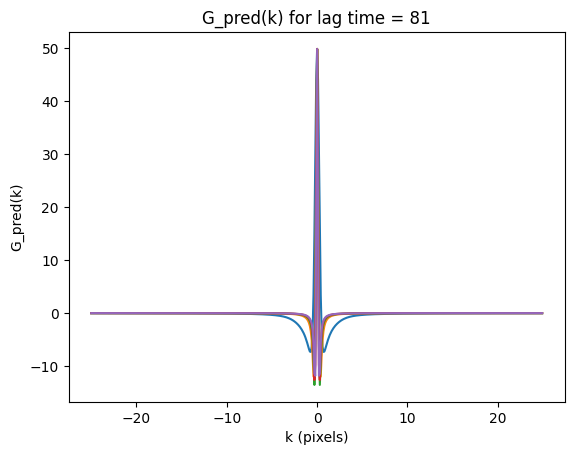

In [219]:
# plot G_pred
for i in range(1, num_frames, 20):
    # plt.plot(r_vals, G_pred[i, :] * 2 * np.pi * r_vals)
    plt.plot(k_vals, G_pred_k[i, :])
    plt.xlabel("k (pixels)")
    plt.ylabel("G_pred(k)")
    plt.title(f"G_pred(k) for lag time = {i}")
    # plt.show()
plt.show()

In [220]:
# laplace transform of G_pred_k(t, k) on time to get u_pred(s, k)
u_pred = np.zeros((s_vals.shape[0], k_vals.shape[0]))
for i in range(s_vals.shape[0]):
    for j in range(k_vals.shape[0]):
        u_pred[i, j] = np.trapz(G_pred_k[:, j] * np.exp(-s_vals[i] * t_vals), t_vals)

# normalize the u_pred
# print(np.trapz(u_pred, k_vals, axis=1).reshape(-1, 1)[0])
# u_pred = u_pred / np.trapz(u_pred, k_vals, axis=1).reshape(-1, 1)

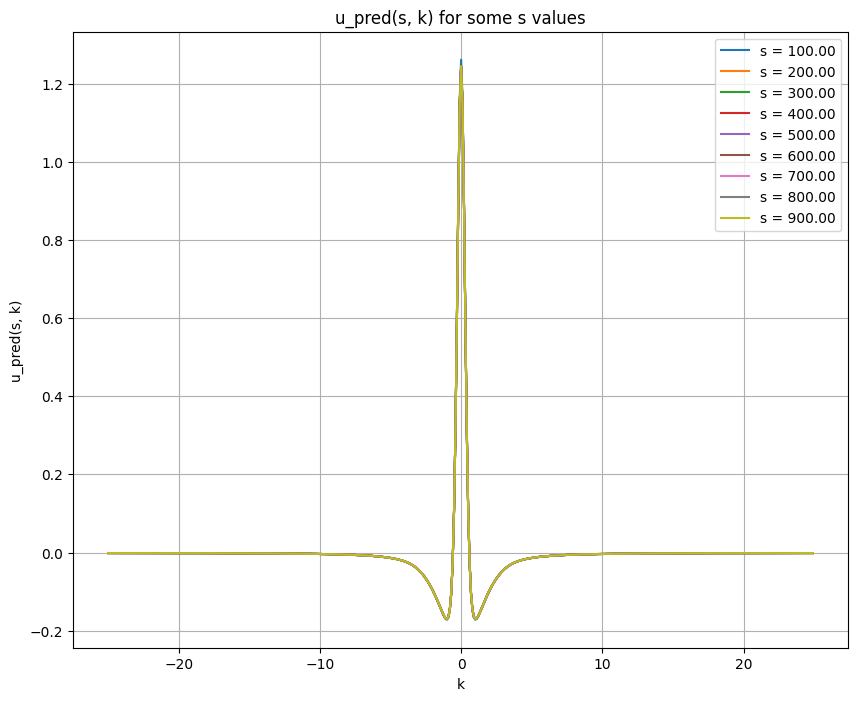

In [221]:
# plot the u_pred(s, k) for some s values
plt.figure(figsize=(10, 8))
plt.title("u_pred(s, k) for some s values")
plt.xlabel("k")
plt.ylabel("u_pred(s, k)")
plt.grid()
for i in range(0, s_vals.shape[0], 10):
    if i == 0:
        continue
    plt.plot(k_vals, u_pred[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

In [222]:
# save the data to u_pred.txt
np.savetxt("u.txt", u_pred)

$Z(\alpha, D, s, k) = \frac{s^{\alpha-1}}{s^{\alpha-1}+Dk^2}$

In [223]:
# calculate Z
# $Z(\alpha, D, s, k) = \frac{s^{\alpha-1}}{s^{\alpha-1}+Dk^2}$
Z = np.zeros((alpha_vals.shape[0], d_vals.shape[0], s_vals.shape[0], k_vals.shape[0]))
for i in range(alpha_vals.shape[0]):
    for j in range(d_vals.shape[0]):
        for k in range(s_vals.shape[0]):
            Z[i, j, k, :] = (s_vals[k]**(alpha_vals[i]-1)) / (s_vals[k]**(alpha_vals[i]-1) + d_vals[j]*k_vals**2)
# normalize Z to have integral of Z over r equal to 1
# Z = Z / np.sum(Z * (r_vals[1]-r_vals[0]))
print(f"shape of Z : {Z.shape}")
print(f"max value of Z : {np.max(Z)}")

shape of Z : (10, 50, 100, 500)
max value of Z : 1.0


In [224]:
# save the data to Z.npy
np.save("Z.npy", Z)